This notebook contains code to reproduce the following from Mitra, et al.:

**Extended Data Figures**

* Extended Data Figure 9: SISTR - A method to estimate selection coefficients for STRs

In [107]:
%pylab inline
import sys
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Simulation_functions import *
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.ticker as ticker
PLOTDIR = '/storage/BonnieH/selection_project/ssc_denovos_paper/figures/ed_fig_9/'

Populating the interactive namespace from numpy and matplotlib


# Extended Data Figure 9a: Mutation matrix

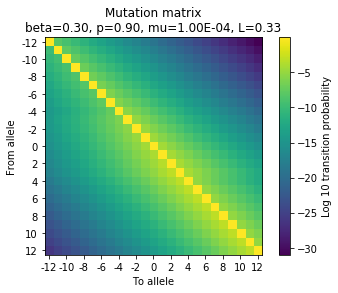

In [108]:
# Simulation parameters
num_alleles = 25
    
# Mutation and selection model parameters
mu = 10**-4
beta = 0.3
p = 0.9
L = 0.33 
PARAM_is_w_additive = True # Whether the fitness matrix of genotypes is additive or multiplicative
        
# Get transition matrix (constant)
transition_matrix = GetTransitionMatrix(num_alleles, mu, beta, p, L)
    
# Visualize transition matrix 
colormap = 'viridis' 
tick_spacing = 2
fig = plt.figure(1)
ax = fig.add_subplot(111)
im = ax.imshow(np.log10(transition_matrix), cmap=colormap) 
label_list = list(range(-1*int(num_alleles/2), int(num_alleles/2)+1, tick_spacing))
label_list.insert(0, 0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(label_list) 
ax.set_yticklabels(label_list)
ax.set_xlabel('To allele')
ax.set_ylabel('From allele')
ax.set_title("Mutation matrix\nbeta=%.2f, p=%.2f, mu=%.2E, L=%.2f"%(beta, p, mu, L))
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('Log 10 transition probability')
plt.savefig(PLOTDIR + 'mutation_matrix_%s_beta_%.2f_p_%.2f_mu_%.2E_L_%.2f.pdf'%(colormap, beta, p, mu, L), bbox_inches='tight')

#  Extended Data Figure 9a: Length-dependent mutation rates

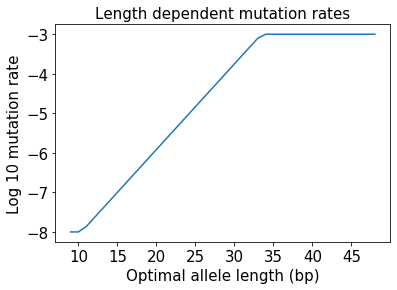

In [109]:
x = list(range(9, 49)) # X axis - optimal allele length
y = [] # Y axis - log 10 mutation rate

mu_opt_allele_5 = 10**-7 # Example mutation rate for trinucleotides with optimal allele 5 
L = 0.65 # Example L parameter value for trinucleotides 

for elem in x:
    
    # Get mutation rate given optimal allele length
    mu = np.log10(mu_opt_allele_5)+L*(elem/3-5) 
   
    # Restrict log 10 of the mutation rate to be between -8 and -3
    if mu < -8:
        mu = -8
        
    if mu > -3:
        mu = -3
    
    y.append(mu)
  
plt.figure(1)
plt.plot(x,y)
plt.xlabel('Optimal allele length (bp)', size=15)
plt.ylabel('Log 10 mutation rate', size=15)
plt.title('Length dependent mutation rates', size=15)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.savefig(PLOTDIR + 'length_dep_mut_rates.pdf', bbox_inches='tight')

#  Extended Data Figure 9a: Mutation sizes

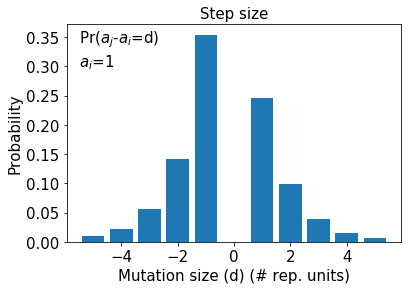

In [110]:
a1 = 1 # Starting allele from which to mutate
to_alleles = list(range(-5+a1, 6+a1)) # Alleles to mutate to
prob = [] # Y axis - probability of mutation
step_sizes = [] # X axis

# Mutation model parameters
p = 0.6
beta = 0.3

# Fill in prob list
for elem in to_alleles:
    a2 = elem
    step_prob = GetStepSizeProb(a1, a2, beta, p)
    prob.append(step_prob)
    
# Fill in step_sizes list
for elem in to_alleles:
    step_sizes.append(elem-a1)
    
# Plot step size probabilities
fig = plt.figure(2)
ax = fig.add_subplot(111)
plt.bar(step_sizes, prob)
plt.xlabel('Mutation size (d) (# rep. units)', size=15)
plt.ylabel('Probability', size=15)
plt.title('Step size', size=15)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
string = 'Pr($a_j$-$a_i$=d) \n$a_i$=' + str(a1)
plt.text(-5.5,0.3, string,  size=15)
plt.savefig(PLOTDIR + 'step_size.pdf',bbox_inches='tight')

#  Extended Data Figure 9b: Selection surface

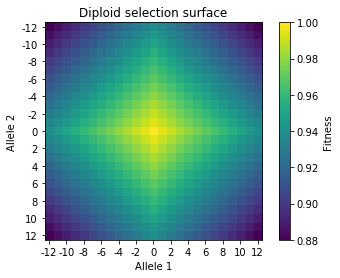

In [111]:
# Selection model parameters
s = 0.01

# Get selection surface for each allele pair (genotype)
fitness_matrix = GetFitnessMatrix(num_alleles, s, PARAM_is_w_additive)
    
# Visualize diploid selection surface
tick_spacing = 2
fig = plt.figure(2)
ax = fig.add_subplot(111)
im = ax.imshow(fitness_matrix, cmap=colormap)
label_list = list(range(-1*int(num_alleles/2), int(num_alleles/2)+1, tick_spacing))
label_list.insert(0, 0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(label_list) 
ax.set_yticklabels(label_list)
ax.set_xlabel('Allele 1')
ax.set_ylabel('Allele 2')
ax.set_title("Diploid selection surface")
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('Fitness')
plt.savefig(PLOTDIR + 'selection_surface_%s_s_%.2f.pdf'%(colormap, s), bbox_inches='tight')

#  Extended Data Figure 9b: Allele fitness

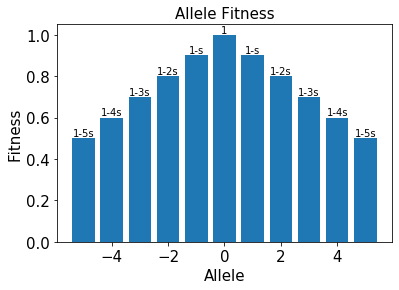

In [112]:
alleles = list(range(-5, 6))
fitness = []

s = 0.1
for elem in alleles:
    w = 1-abs(elem)*s
    fitness.append(w)

fig, ax = plt.subplots()
rects = ax.bar(alleles, fitness) 
ax.set_xlabel('Allele', size=15)
ax.set_ylabel('Fitness', size=15)
ax.set_title('Allele Fitness', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
rects = ax.patches

# Labels
labels = ['1-5s','1-4s', '1-3s', '1-2s', '1-s', '1', '1-s', '1-2s', '1-3s', '1-4s', '1-5s']

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', size=10)

plt.savefig(PLOTDIR + 'allele_fitness.pdf', bbox_inches='tight')

# Extended Data Figure 9c: Example simulations

In [113]:
# Function to plot allele frequencies

def plot_freqs(i, num_alleles, allele_freqs, title, filename):
     
    fig = plt.figure(i)
    ax = fig.add_subplot(111)
       
    ax.bar(list(range(-1*int(num_alleles/2), int(num_alleles/2)+1)), allele_freqs)
    ax.set_title(title, size=15)
    ax.set_xlabel("Allele",size=15)
    ax.set_ylabel("Frequency",size=15)
    plt.xticks(fontsize=15) 
    plt.yticks(fontsize=15)
    plt.savefig(filename, bbox_inches='tight')

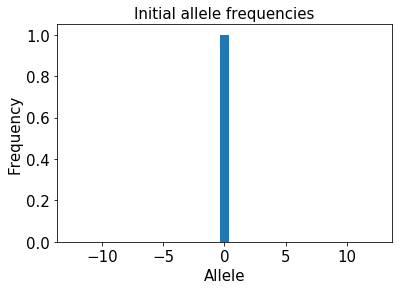

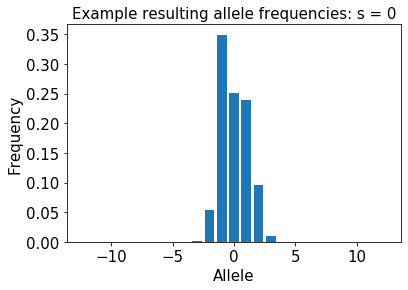

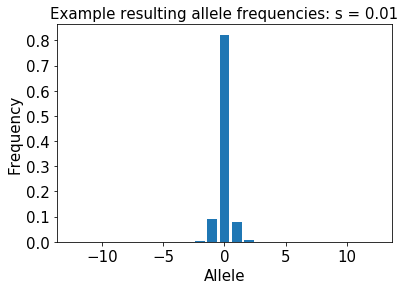

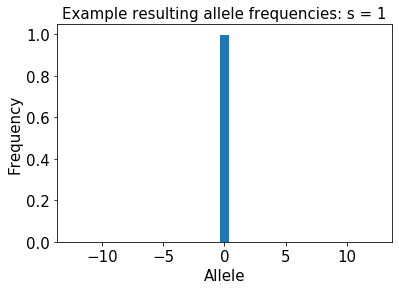

In [114]:
# Simulation parameters
num_alleles = 25
n_effec = 7310
max_iter = 55920
end_samp_n = 6500

# Mutation model parameters
mu = 10**-3
beta = 0.3
p = 0.9
L = 0.33
    
#  Visualize initial allele frequencies
i = 1 # Figure number
allele_freqs = np.zeros(num_alleles)
allele_freqs[int(num_alleles/2)] = 1
    
title = 'Initial allele frequencies'
filename = PLOTDIR +'initial_allele_freqs.pdf'
plot_freqs(i, num_alleles, allele_freqs, title, filename)
    
# Plot example allele frequencies for different s values
svals = [0, 0.01, 1]
    
for sval in svals:
    i = i + 1
    allele_freqs_20k, allele_freqs_50k, allele_freqs_euro = Simulate(num_alleles, n_effec, mu, beta, p, L, sval, max_iter, end_samp_n, False)
          
    title = "Example resulting allele frequencies: s = " + str(sval)
    filename = PLOTDIR + 'equi_allele_freqs_s_'+ str(sval) + '.pdf'
    plot_freqs(i, num_alleles, allele_freqs_euro, title, filename)

#  Extended Data Figure 9d: SISTR overview

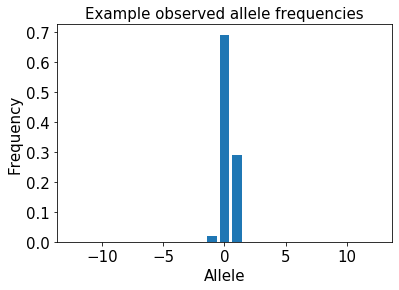

In [115]:
# Example of observed allele frequencies

allele_freqs = np.zeros(num_alleles)

allele_freqs[int(num_alleles/2)] = 0.69
allele_freqs[int(num_alleles/2)-1] = 0.02
allele_freqs[int(num_alleles/2)+1] = 0.29

i = 1
title = 'Example observed allele frequencies'
filename = PLOTDIR + 'obs_freqs_example.pdf'
plot_freqs(i, num_alleles, allele_freqs, title, filename)

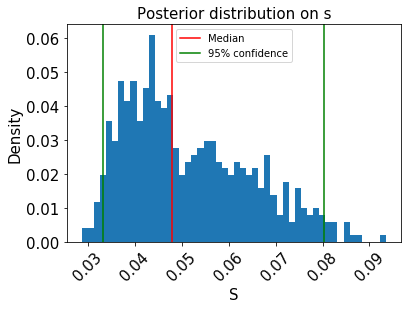

In [116]:
# Example of posterior distribution on s

abc_model = 'eurodem_prior2'
period = 3
opt_allele = 12
num_bins = 5
file = '/gymreklab-tscc/bonnieh/abc/results/' + abc_model + '/' + str(period) + '_' + str(opt_allele) + '.txt' 
abc_list = GetABCList(file, num_bins)

obs_het = 0.05
obs_common = 2
obs_bins = [0,0.01,0.97,0.02,0] 
constant_het = 0.005
denom_het = 3
constant_common = 1
denom_common = 4
eps_bins = 0.3
use_het = 'y'
use_common = 'n'
use_bins = 'y'

# Get posterior distribution of s using approximate Bayesian computation
median_s, lower_bound, upper_bound, num_accepted, s_accepted = Get_S_ABC(abc_list, obs_het, obs_common, obs_bins, \
                                                                         constant_het, denom_het, constant_common, \
                                                                         denom_common, eps_bins, use_het, use_common, use_bins)
plt.figure(1)
plt.hist(s_accepted, bins=50, weights=np.ones(len(s_accepted)) / len(s_accepted)) 
plt.xlabel("S", size=15)
plt.ylabel("Density", size=15) 
plt.axvline(x=median_s, color="red", label = 'Median')
plt.axvline(x=lower_bound, color="green", label="95% confidence")
plt.axvline(x=upper_bound, color="green")
plt.legend() 
plt.title("Posterior distribution on s", size=15)
plt.xticks(fontsize=15, rotation=45) 
plt.yticks(fontsize=15)
plt.savefig(PLOTDIR + 'posterior_distr_s.pdf',bbox_inches='tight')